<a href="https://colab.research.google.com/github/rtajeong/M4_2025/blob/main/lab_63_keras_embedding_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedding with Keras.Embedding() Layer

- 정수 인덱스를 벡터로 매핑하는 딕셔너리 구조 (인덱스 크기, 벡터 크기)
- 학습 시키는 데이터에 따라 다른 임베딩이 만들어진다.

- IMDB 영화 리뷰 데이터를 사용한 임베딩 예제
  - IMDB: (internet movie database) the world's most popular and authoritative source for movie, TV and celebrity content



In [20]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, Dropout, Input
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
import os, os.path
import zipfile
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- 5000 개의 단어만 사용하고, 각 문장에서는 뒤에서부터 500 개의 단어만 사용하겠음.

In [2]:
max_features = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# y_train[:1000].sum(), y_train[-1000:].sum()   # can assume equally distributed

In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [5]:
print(y_train[0])
print(x_train[0])

1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [12]:
type(imdb.get_word_index())   # {'word': index, ...}

dict

In [13]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}

print('---review with words---')
print([id2word.get(i, ' ') for i in x_train[0]])
print('---label---')
print(y_train[0])

---review with words---
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', '

In [14]:
# 각 문장이 몇개의 단어로 구성되어 있는지 확인
[len(x_train[i]) for i in range(10)]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [ ]:
print(max([len(x_train[i]) for i in range(25000)]), min([len(x_train[i]) for i in range(25000)]))
print(max([len(x_test[i]) for i in range(25000)]), min([len(x_test[i]) for i in range(25000)]))

2494 11
2315 7


In [15]:
x_train[0:2]   # words tokenized and expressed by (word) numbers

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [16]:
# 마지막 500개의 단어들만 사용한다. -> 500개보다 적으면 똑같은 길이로 만들어 준다.
maxlen = 500
x_train_p=preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test_p=preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train_p.shape, x_test_p.shape)

(25000, 500) (25000, 500)


In [17]:
y_train.shape, y_test.shape

((25000,), (25000,))

## Embedding layer only

- Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 리턴합니다.

In [21]:
model = Sequential()
model.add(Input(shape=(500,)))
model.add(Embedding(5000, 32)) # input 각 단어에 대해 32-vector 로 임베딩
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        16,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,001 (687.50 KB)

 Trainable params: 176,001 (687.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.input_shape, model.output_shape

((None, 500), (None, 1))

In [23]:
x_train_p.shape, y_train.shape

((25000, 500), (25000,))

In [24]:
history = model.fit(x_train_p, y_train,
                    epochs=10, batch_size=64,
                    validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.6079 - loss: 0.6396 - val_acc: 0.8618 - val_loss: 0.3370
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8874 - loss: 0.2811 - val_acc: 0.8714 - val_loss: 0.2984
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9377 - loss: 0.1886 - val_acc: 0.8712 - val_loss: 0.3051
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9634 - loss: 0.1285 - val_acc: 0.8702 - val_loss: 0.3121
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9810 - loss: 0.0859 - val_acc: 0.8664 - val_loss: 0.3406
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9910 - loss: 0.0541 - val_acc: 0.8664 - val_loss: 0.3560
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9963 - loss: 0.0340 - val_acc: 0.8608 - val_loss: 0.3841
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9989 - loss: 0.0209 - val_acc: 0.8630 - val_loss: 0.3994
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

Text(0.5, 1.0, 'Training(--) and validation loss')

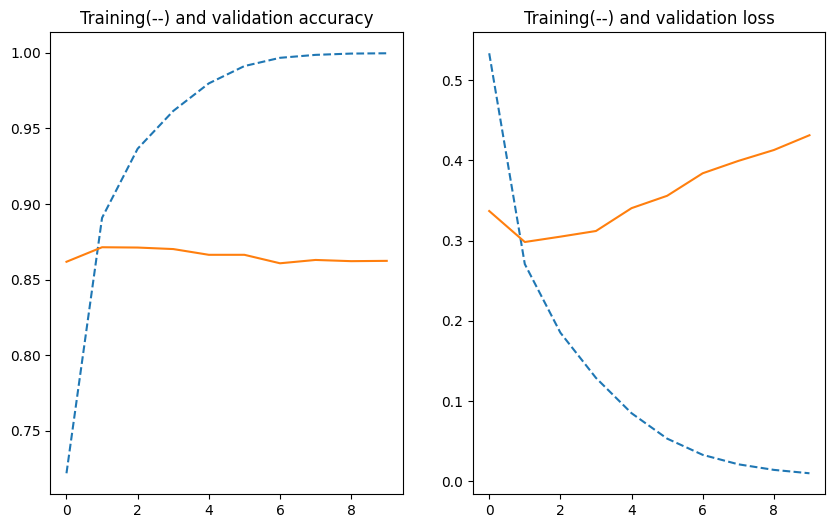

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

In [26]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8617200255393982


- 위의 결과는 500 개의 단어만 고려한 것임.
- 각 단어를 독립적으로 다루었으며, 문장의 구성 정보를 고려하지 않음
- 문장의 구조 정보를 고려하려면 임베딩 층 위에 합성곱이나 순환신경망 층을 추가한다

## CNN

In [27]:
model = Sequential()
model.add(Input(shape=(500,)))
model.add(Embedding(input_dim=5000, output_dim=32))  # (500, 32)
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 496, 128)       │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 99, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 95, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 15, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,345 (1.38 MB)

 Trainable params: 361,345 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(x_train_p, y_train,
                    epochs=10, batch_size=64,
                    validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - acc: 0.5216 - loss: 0.6820 - val_acc: 0.8296 - val_loss: 0.3882
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.8630 - loss: 0.3291 - val_acc: 0.8818 - val_loss: 0.2836
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.9227 - loss: 0.2054 - val_acc: 0.8866 - val_loss: 0.2851
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.9590 - loss: 0.1282 - val_acc: 0.8848 - val_loss: 0.3202
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.9728 - loss: 0.0837 - val_acc: 0.8538 - val_loss: 0.5732
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9800 - loss: 0.0570 - val_acc: 0.8788 - val_loss: 0.4665
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9913 - loss: 0.0274 - val_acc: 0.8632 - val_loss: 0.7041
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9929 - loss: 0.0231 - val_acc: 0.8724 - val_loss: 0.6703
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - 

Text(0.5, 1.0, 'Training(--) and validation loss')

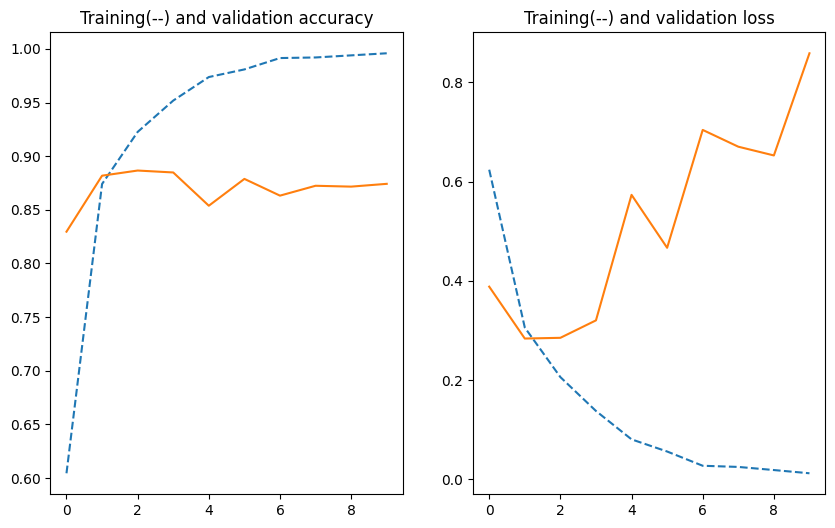

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

In [30]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8608400225639343


In [31]:
# prediction
model.predict(x_test_p[0:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


array([[1.8061021e-08],
       [1.0000000e+00],
       [9.3103760e-01],
       [8.0664391e-03],
       [9.9999845e-01]], dtype=float32)

In [32]:
# ground truth
y_test[0:5]

array([0, 1, 1, 0, 1])

## GRU RNN 추가

In [33]:
x_train_p.shape

(25000, 500)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU

model = Sequential()
model.add(Input(shape=(500,)))
model.add(Embedding(input_dim=5000, output_dim=32))
model.add(GRU(32))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,425 (654.00 KB)

 Trainable params: 167,425 (654.00 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
%time history = model.fit(x_train_p, y_train,
                          epochs=10,
                          batch_size=64,   # 배치 = 64 문장 (문장마다 hidden state 초기화)
                          validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - acc: 0.6314 - loss: 0.6208 - val_acc: 0.7992 - val_loss: 0.4342
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - acc: 0.8724 - loss: 0.3274 - val_acc: 0.8672 - val_loss: 0.3239
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - acc: 0.9002 - loss: 0.2648 - val_acc: 0.8706 - val_loss: 0.3184
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - acc: 0.9233 - loss: 0.2180 - val_acc: 0.8718 - val_loss: 0.3134
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.9350 - loss: 0.1859 - val_acc: 0.8610 - val_loss: 0.3497
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - acc: 0.9408 - loss: 0.1703 - val_acc: 0.8718 - val_loss: 0.3280
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.9544 - loss: 0.1355 - val_acc: 0.8778 - val_loss: 0.3776
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - acc: 0.9561 - loss: 0.1263 - val_acc: 0.8690 - val_loss: 0.4312
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18m

In [36]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8650799989700317


Text(0.5, 1.0, 'Training(--) and validation loss')

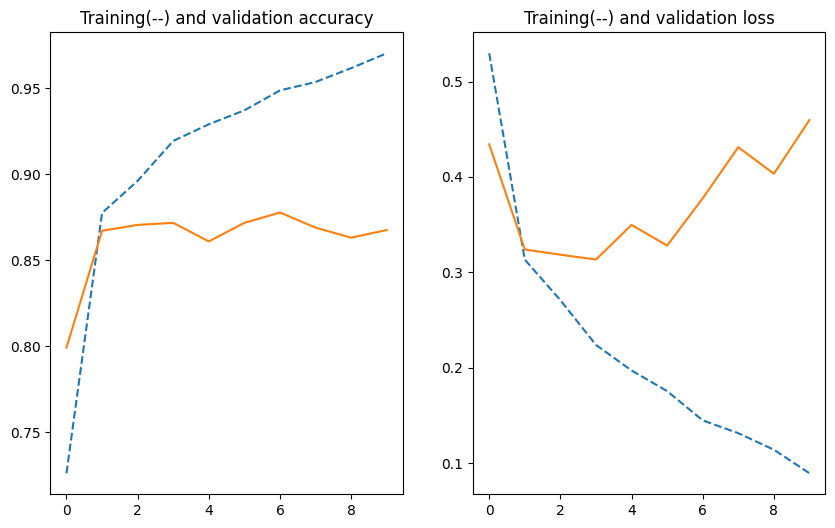

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

In [38]:
# prediction
model.predict(x_test_p[0:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([[0.10664455],
       [0.9998357 ],
       [0.04799033],
       [0.13175477],
       [0.9998927 ]], dtype=float32)

In [39]:
# ground truth
y_test[0:5]

array([0, 1, 1, 0, 1])

- y_test[2] 는 무슨 문장일까?

In [40]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print([id2word.get(i, ' ') for i in x_test[2]])
print(y_test[2])

['the', 'plot', 'near', 'ears', 'recent', 'and', 'and', 'of', 'him', 'flicks', 'frank', 'br', 'by', 'excellent', 'and', 'br', 'of', 'past', 'and', 'near', 'really', 'all', 'and', 'family', 'four', 'and', 'to', 'movie', 'that', 'obvious', 'family', 'brave', 'movie', 'is', 'got', 'say', 'and', 'with', 'up', 'comment', 'this', 'and', 'been', 'of', 'entertaining', 'not', 'be', 'and', 'james', 'in', 'you', 'seen', 'and', 'and', 'portrayed', 'dirty', 'in', 'so', 'washington', 'and', 'this', 'you', 'minutes', 'no', 'all', 'station', 'all', 'after', 'and', 'promising', 'who', 'and', 'and', 'and', 'to', 'and', 'any', 'by', 'speed', 'they', 'is', 'my', 'as', 'screams', 'dirty', 'in', 'of', 'full', 'br', 'pacino', 'dignity', 'need', 'men', 'of', 'and', 'popular', 'really', 'all', 'way', 'this', 'and', 'this', 'and', 'they', 'is', 'my', 'no', 'standard', 'certainly', 'near', 'br', 'an', 'beach', 'with', 'this', 'make', 'and', 'i', 'i', 'of', 'fails', 'and', 'br', 'of', 'finished', 'wear', 'psycho'

## Combine CNN and RNN together

In [41]:
model = Sequential()
model.add(Input(shape=(500,)))
model.add(Embedding(input_dim=5000, output_dim=32))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 496, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 124, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 55)             │        26,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,760 (768.59 KB)

 Trainable params: 196,760 (768.59 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [43]:
%time history = model.fit(x_train_p, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - acc: 0.6270 - loss: 0.5998 - val_acc: 0.8676 - val_loss: 0.3080
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.8973 - loss: 0.2637 - val_acc: 0.8952 - val_loss: 0.2597
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.9153 - loss: 0.2186 - val_acc: 0.8932 - val_loss: 0.2563
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - acc: 0.9290 - loss: 0.1871 - val_acc: 0.8914 - val_loss: 0.2581
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.9433 - loss: 0.1555 - val_acc: 0.8898 - val_loss: 0.2700
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.9433 - loss: 0.1471 - val_acc: 0.8904 - val_loss: 0.2898
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - acc: 0.9521 - loss: 0.1287 - val_acc: 0.8904 - val_loss: 0.2942
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.9596 - loss: 0.1149 - val_acc: 0.8928 - val_loss: 0.3110
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/

In [44]:
# test score
scores = model.evaluate(x_test_p, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8772000074386597


Text(0.5, 1.0, 'Training(--) and validation loss')

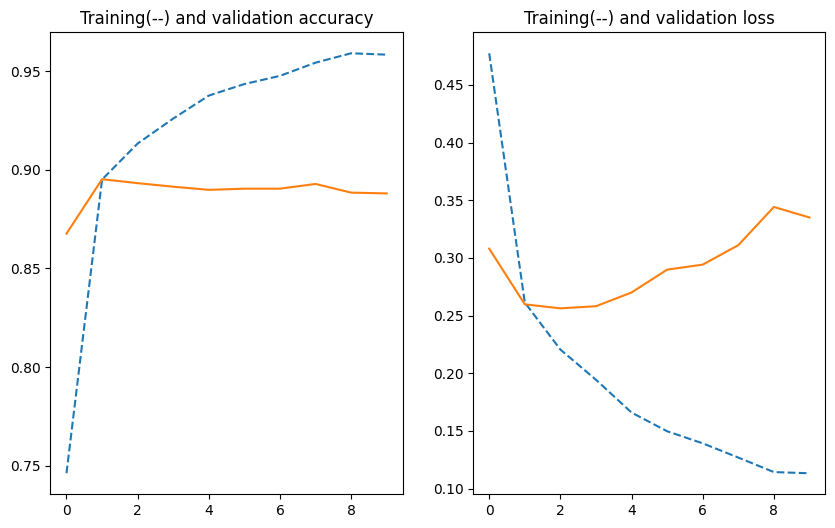

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

# Exercise (연습)
- By default, if a GPU is available, the embedding matrix will be placed on the GPU. This achieves the best performance.
- in order to use CPU (too big to fit on GPU), you should use CPU
  - with tf.device('cpu:0'):
  -embedding_layer = Embedding(...)
  - embedding_layer.build()

In [47]:
import tensorflow as tf
# 문장 토큰화와 단어 토큰화
text=[['Hope', 'to', 'see', 'you', 'soon'],
      ['Nice', 'to', 'see', 'you', 'again']]

# 각 단어에 대한 정수 인코딩
text=[[0, 1, 2, 3, 4],
      [5, 1, 2, 3, 6]]

# 위 데이터가 아래의 임베딩 층의 입력이 된다. (훈련 없이 모양만 보기 위함)
embedding_layer = Embedding(7, 2)
result = embedding_layer(tf.constant([0, 1, 2, 3, 4, 5, 6]))
print(result.numpy())

# 7은 단어의 개수. 즉, 단어 집합(vocabulary)의 크기이다.
# 2는 임베딩한 후의 벡터의 크기이다.


[[ 0.03789626 -0.01769961]
 [ 0.03232038 -0.01250659]
 [-0.03669653 -0.03626321]
 [-0.0232222  -0.00648643]
 [ 0.02204586  0.03250236]
 [-0.01367161  0.02988463]
 [ 0.03299925  0.01331877]]


In [49]:
model = Sequential()
model.add(Input(shape=(5,)))
model.add(Embedding(7, 2))
model.add(Flatten())
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 5, 2)           │            14 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
model = Sequential()
model.add(Input(shape=(5,)))
model.add(Embedding(7, 2))
model.add(Flatten())
model.add(Dense(1))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 5, 2)           │            14 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
# second example
# https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/22_word_embedding/supervised_word_embeddings.ipynb
# the code we have in the slide

import numpy as np
from tensorflow.keras.preprocessing.text import one_hot  # deprecated (integer encoding, not one-hot encoding)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

In [52]:
# deprecated
one_hot("amazing restaurant",30)    # deprecated
vocab_size = 30
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
print(encoded_reviews)

[[21, 3], [6, 20], [17, 14], [20, 2, 6], [17, 6, 20], [17, 3], [5, 6, 8], [16, 3], [16, 11], [3, 5]]


- how do I assign integers to the words
  - 1. create a tokenizer
  - 2. Fit the Tokenizer to Your Text Data:
  - 3. Convert Text to Integer Sequences:

In [ ]:
# recommended to use the following

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=30)
tokenizer.fit_on_texts(reviews)
encoded_reviews = tokenizer.texts_to_sequences(reviews)
encoded_reviews

[[4, 1],
 [5, 6],
 [7, 8],
 [9, 10, 11],
 [12, 2, 13],
 [14, 1],
 [15, 2, 16],
 [3, 17],
 [3, 18],
 [19, 20]]

In [ ]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

[[23 27  0  0]
 [20  7  0  0]
 [13  6  0  0]
 [19  7  3  0]
 [29 15 19  0]
 [10 27  0  0]
 [ 5 15 11  0]
 [ 9  8  0  0]
 [ 9 12  0  0]
 [22 10  0  0]]


In [ ]:
embeded_vector_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length,name="embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
X = padded_reviews
y = sentiment

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 5)              150       
                                                                 
 flatten_3 (Flatten)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.fit(X, y, epochs=50, verbose=0)

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X, y)
accuracy

1/1 [==============================] - 0s 122ms/step - loss: 0.6315 - accuracy: 1.0000


1.0

In [ ]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

30

In [ ]:
weights[13]

array([ 0.09442479, -0.05950601,  0.10476856,  0.0594478 ,  0.02477837],
      dtype=float32)

In [ ]:
weights[[4,16]]

array([[-0.03665886, -0.04423094, -0.04667864, -0.01804609,  0.03361577],
       [-0.02017764, -0.02853099, -0.02422168,  0.00339473,  0.03004286]],
      dtype=float32)

 --- end ---